In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

In [3]:
from src.Tile import Tile
from src import augmentation, io_utils, s3_utils, image_utils, image_metrics

# Assumptions about tiles' behaviour

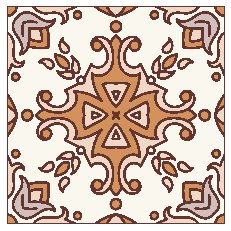

In [4]:
tile = Tile(
    cv2.cvtColor(cv2.imread('dataset_processed/dataset-bing-azulejo vector_000016.jpg'), cv2.COLOR_BGR2RGB)
)
tile.plot()

Assumption 1: if x is tile, so is every quandrant of x.

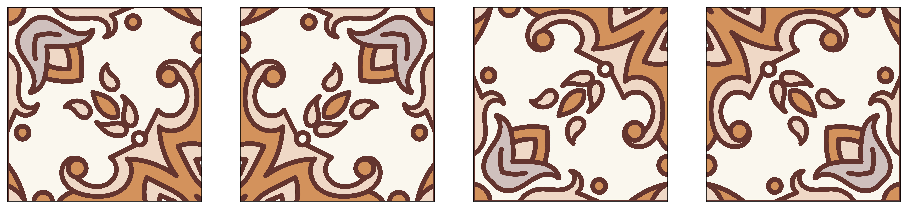

In [5]:
Tile.plot_grid(
    [
        tile.get_quadrant(0, 0),
        tile.get_quadrant(0, 1),
        tile.get_quadrant(1, 0),
        tile.get_quadrant(1, 1)
    ],
    cols=4
)

Assumption 2: if x is tile, so is rhombus cut out of x.

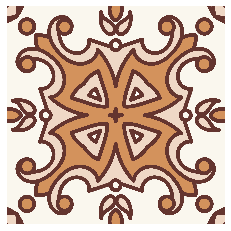

In [6]:
tile.get_rhombus().plot()

Assumption 3: if x is tile, so is x with cut out center.

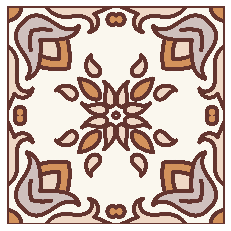

In [7]:
tile.remove_center().plot()

Assumption 4: if x is tile, so is square centered cut out of x.

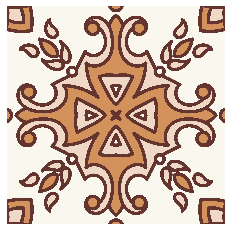

In [8]:
tile.get_square_from_center(0.8).plot()

Assumption 5: if x is tile, so is x with added border, which will mirror outsides of x.

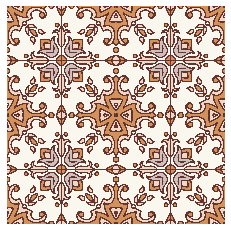

In [9]:
tile.add_border_reflect(border_thickness=0.5).plot()

Assumption 6: if x is tile, so is image assembled of 4 x-s.

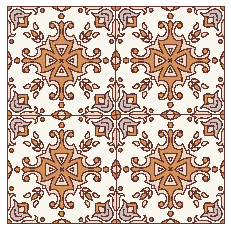

In [10]:
tile.assemble_quadrant_windmill().plot()

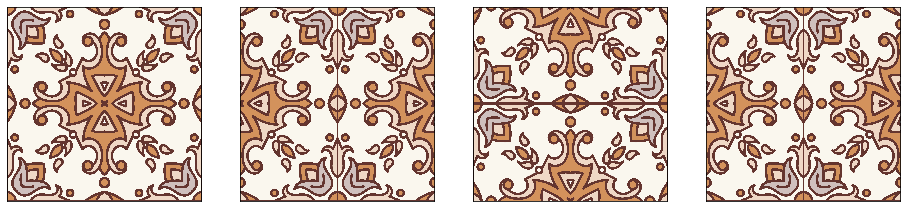

In [11]:
tile_quandrant = tile.get_quadrant(0, 0)
Tile.plot_grid(
    [
        tile_quandrant.assemble_quadrant_unfold(0, 0),
        tile_quandrant.assemble_quadrant_unfold(0, 1),
        tile_quandrant.assemble_quadrant_unfold(1, 0),
        tile_quandrant.assemble_quadrant_unfold(1, 1)
    ],
    cols=4
)

Assumption 7: if x is tile, so is recolored x.

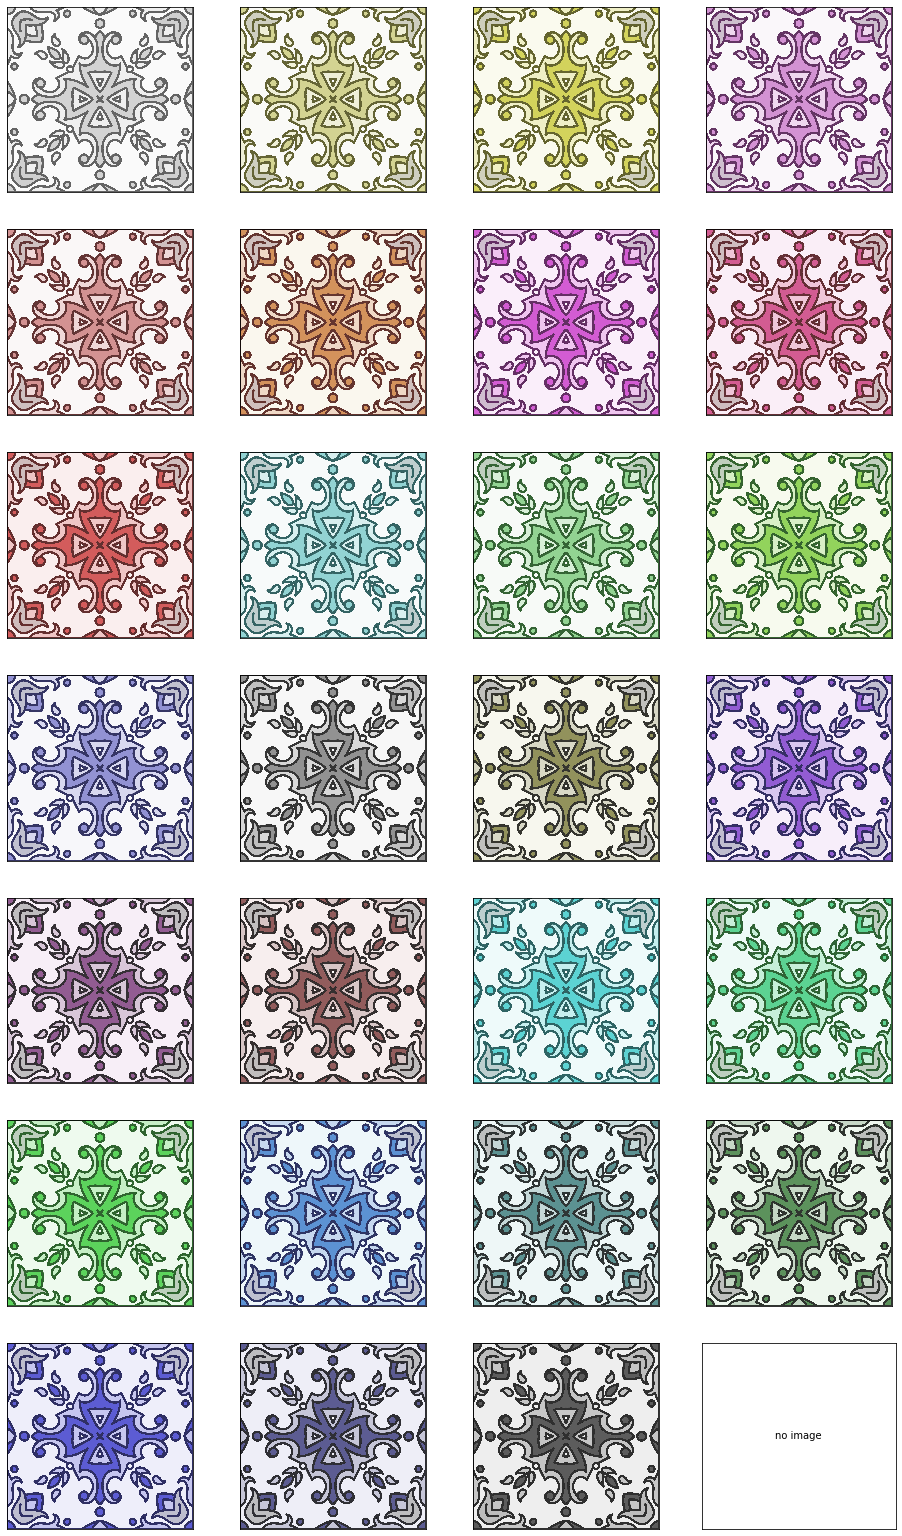

In [12]:
channels = product([0, 1, 2], repeat=3)

Tile.plot_grid(
     [tile.recolour(_) for _ in channels],
    cols=4
)

# Demonstration of data augmentation

In following section I will use some of demonstrated above methods to generate new tiles. Results are being saved to s3.

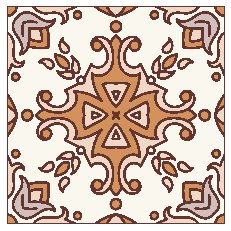

In [13]:
tile = Tile(
    cv2.cvtColor(cv2.imread('dataset_processed/dataset-bing-azulejo vector_000016.jpg'), cv2.COLOR_BGR2RGB)
)
tile.plot()

In [14]:
key = 'deep-azulejo/example_1'
s3_utils.delete_from_s3(key)

In [15]:
%%time
augmentation.enrich(tile, key, max_fragmentation_depth=1, max_augmentation_depth=0)

CPU times: user 10.8 s, sys: 182 ms, total: 11 s
Wall time: 16 s


In [16]:
len(s3_utils.get_image_list_from_s3(key))

48

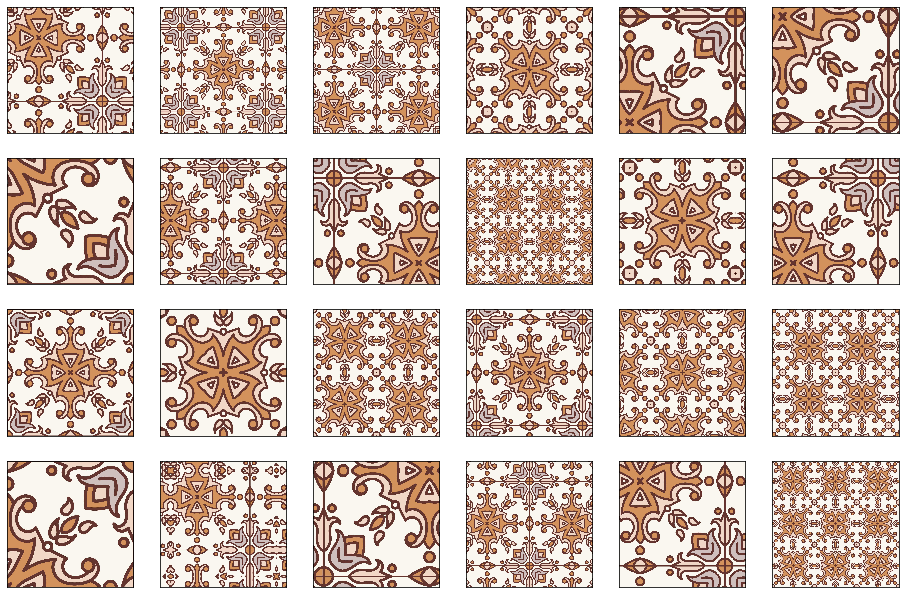

In [17]:
io_utils.plot_sample_files_from_s3(key, plot_sample=24)

## Another example

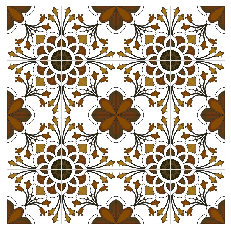

In [18]:
tile = Tile(
    cv2.cvtColor(cv2.imread('dataset_processed/dataset-google-portuguese tiles_000219.jpg'), cv2.COLOR_BGR2RGB)
)
tile.plot()

In [19]:
key = 'deep-azulejo/example_2'
s3_utils.delete_from_s3(key)

In [20]:
%%time
augmentation.enrich(tile, key, max_fragmentation_depth=2, max_augmentation_depth=0)

CPU times: user 7.71 s, sys: 80 ms, total: 7.79 s
Wall time: 25.7 s


In [21]:
len(s3_utils.get_image_list_from_s3(key))

141

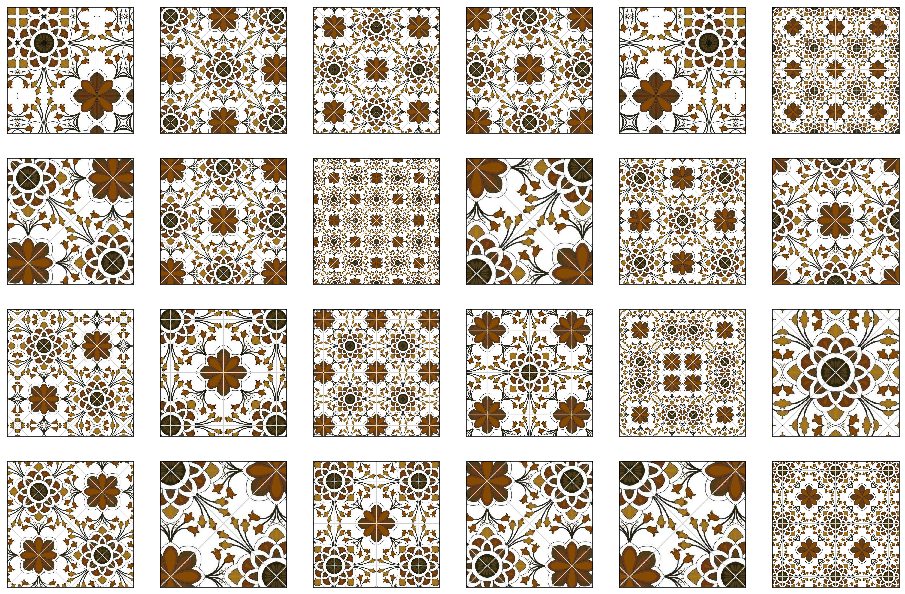

In [22]:
io_utils.plot_sample_files_from_s3(key, plot_sample=24)

## Yet another example

In [23]:
file = 'dataset_processed/dataset-bing-azulejo_4_000032_6.jpg'

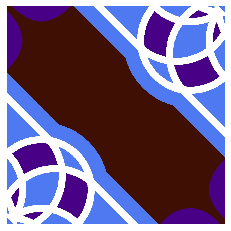

In [24]:
# file = 'dataset_processed/{}'.format(
#     np.random.choice([_ for _ in os.listdir('dataset_processed')  if _.endswith(".jpg")])
# )
tile = Tile(
    cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
)
tile.plot()

In [25]:
key = 'deep-azulejo/example_3'
s3_utils.delete_from_s3(key)

In [26]:
%%time
augmentation.enrich(tile, key, max_fragmentation_depth=0, max_augmentation_depth=2)

CPU times: user 28.7 s, sys: 167 ms, total: 28.9 s
Wall time: 48.8 s


In [27]:
len(s3_utils.get_image_list_from_s3(key))

159

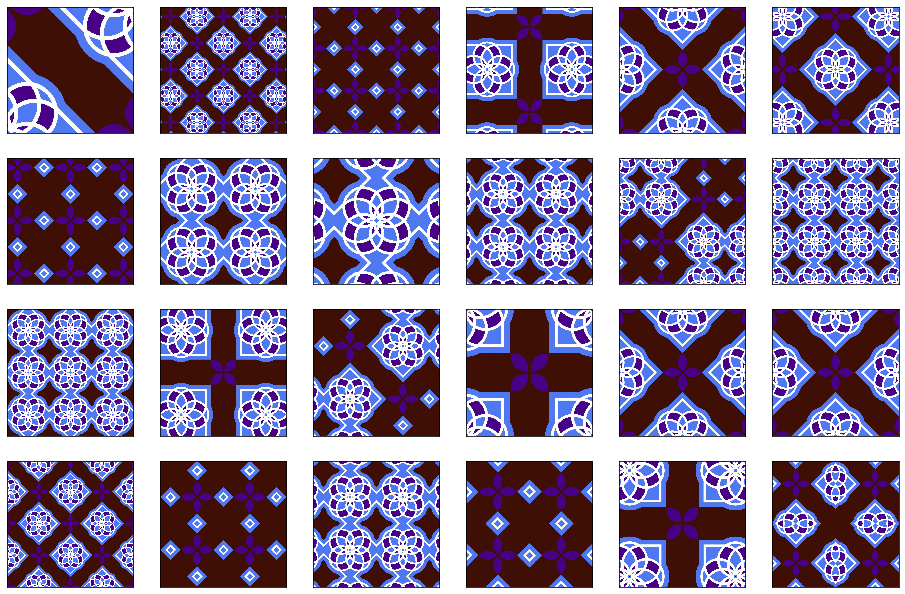

In [28]:
io_utils.plot_sample_files_from_s3(key, plot_sample=24)